In [62]:
import numpy as np
import pandas as pd

# load metadata of images
images = pd.DataFrame(pd.read_pickle("image_info.pkl"))

# load image embeddings
allVectors = pd.DataFrame(pd.read_pickle("image_vectors.pkl"))

In [63]:
image_id, vectors = zip(*allVectors.items())
embeddings = np.array(vectors)

In [64]:
from sklearn.metrics.pairwise import cosine_similarity
from autoencoder_resnet18 import img2vec
from PIL import Image

In [65]:
# path of input image
input_path = "/Users/nick/Documents/jumbo-jet-flying-sky.jpg"
Img = Image.open(input_path)
# calculate embedding for input image
query_vector = img2vec.getVec(Img)

In [66]:
# calculate similarity scores
scores = cosine_similarity([query_vector], embeddings)[0]

In [67]:
# Find the closest 10 vectors and their similarity scores
closest_indices = np.argsort(-scores)[:10]
closest_vectors = scores[closest_indices]

print("Indices of the 10 closest vectors:\n", closest_indices)
print("Similarity/Distance of the 10 closest vectors:\n", scores[closest_indices])

Indices of the 10 closest vectors:
 [444888 339060 333368 307506 334447 324550 485857 444909 455447 303569]
Similarity/Distance of the 10 closest vectors:
 [0.87099904 0.85207486 0.85156345 0.8503737  0.8476318  0.84752685
 0.8446801  0.8441464  0.8430536  0.84187245]


In [68]:
# find image names of the 10 most similar images
closest_image_ids = [image_id[i] for i in closest_indices]
print("Namen der 10 ähnlichsten Bilder:\n", closest_image_ids)

Namen der 10 ähnlichsten Bilder:
 [444889, 339061, 333369, 307507, 334448, 324551, 485858, 444910, 455448, 303570]


In [69]:
import matplotlib.pyplot as plt
import cv2
import os

# function to display an image
def show_image(image_path, title):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

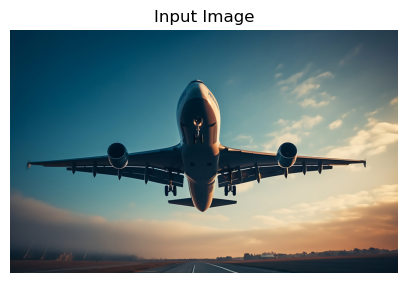

In [70]:
# display input image
show_image(input_path, "Input Image")

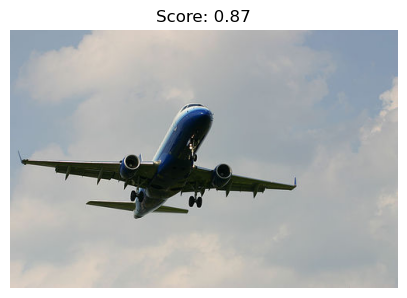

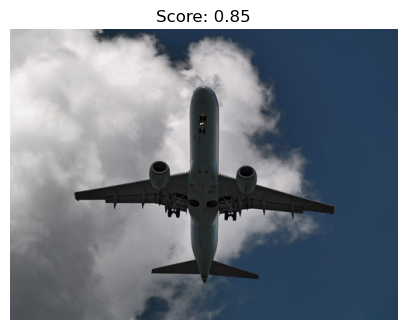

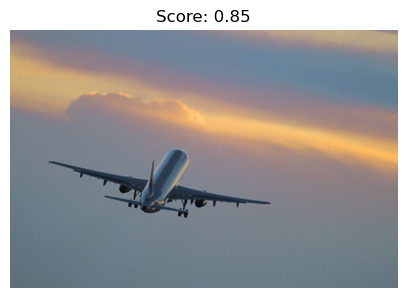

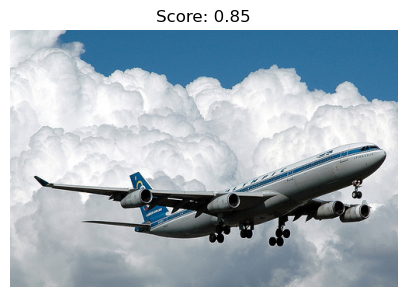

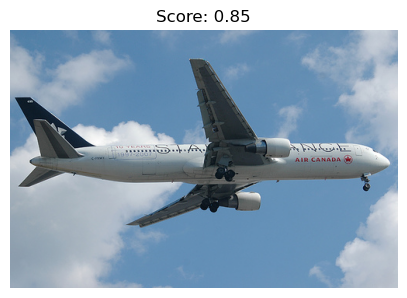

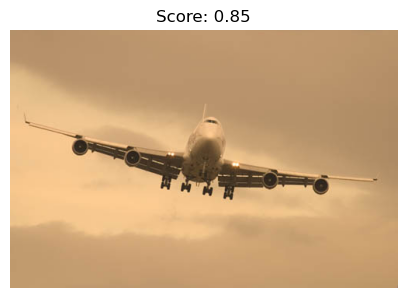

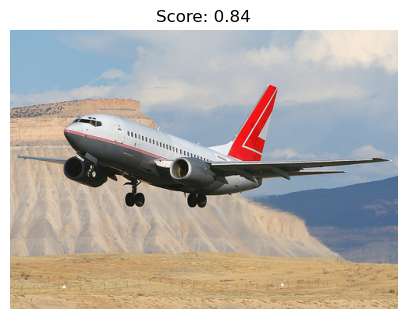

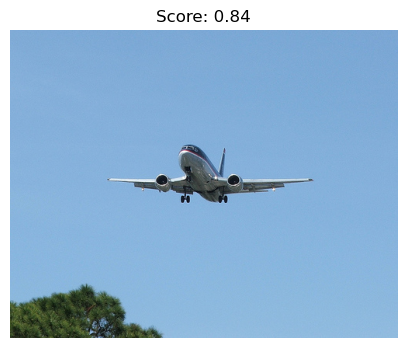

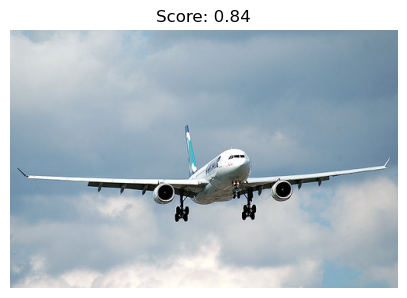

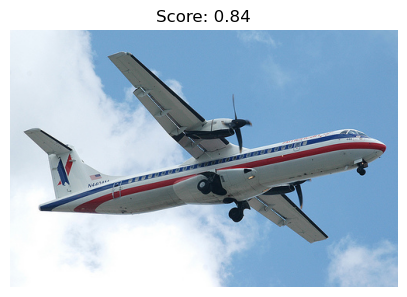

In [71]:
# Retrieve information of the most similar images from the CSV file
for i in range(10):
    closest_image_id = closest_image_ids[i]
    closest_score = closest_vectors[i]
    
    # Retrieve information from the DataFrame using image names
    closest_image_info = images[images['image_id'] == closest_image_id].iloc[0]

    # Get image path and set title
    image_path = os.path.join(closest_image_info['root'], closest_image_info['file'])
    title = f"Score: {closest_score:.2f}"

    # Display the most similar image
    show_image(image_path, title)